<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML and DS Program)

# Project: Time Series Forecasting - AirPassengers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose


%matplotlib inline

## 1. Data Collection

**Load the AirPassengers dataset**

In [2]:
#This dataset represents monthly total of US airline passengers for 12 years of 1949 to 1960

In [6]:
data = pd.read_csv('AirPassengers.csv',  parse_dates = True, index_col = 'Month')

data.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
data.columns = ['Passengers'] #Rename the column
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
type(data)

pandas.core.frame.DataFrame

**Lets convert this into a Series from dataframe**

In [9]:
airp = pd.Series(data['Passengers'])
airp.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [10]:
airp.shape

(144,)

**Lets see if there are any missing values**

In [11]:
airp.isnull().sum() # Looks like there are no missing values

0

In [12]:
airp[airp.isnull()] # Looks like there are no missing values

Series([], Name: Passengers, dtype: int64)

## 2. Preliminary Visualization

In [13]:
airp.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [14]:
airp.index # Its a datetime index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

**Lets visualize the series**

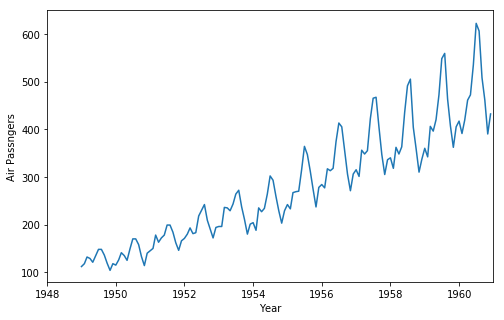

In [15]:
fig = plt.figure(figsize = (8,5))
plt.plot(airp.index, airp)
plt.xlabel('Year')
plt.xlim('1948', '1961')

plt.ylabel('Air Passngers')
plt.ylim(80,650)

plt.show()

**Lets see how many passengers travelled each year**

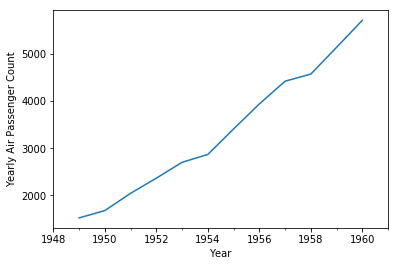

In [18]:
airp.resample('Y').sum().plot()

plt.xlabel('Year')
plt.xlim('1948', '1961')

plt.ylabel('Yearly Air Passenger Count')

plt.show()

In [19]:
#We can see that there seems to be a clear trend

**Which months have passengers travelled more often**

In [20]:
airp.groupby(airp.index.month).mean()

Month
1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
Name: Passengers, dtype: float64

**Plotting the same.**

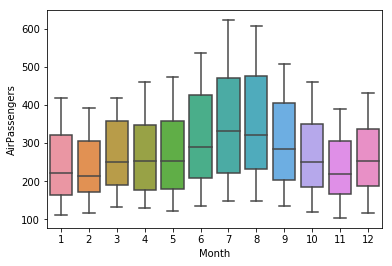

In [21]:
sns.boxplot(airp.index.month, airp.values)
plt.ylabel('AirPassengers')
plt.show()

In [22]:
#July and August seem to be the more popular months for air travel

## 3. Stationarity Checks and Data Preprocessing

In [23]:
#Before applying ARIMA, we want to ensure if the series is stationary. 
# If not, we need to performing some preprocessing techniques to statonarize the series.

In [24]:
airp.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [25]:
airp.shape

(144,)

### 3.1 Seasonality and Trends

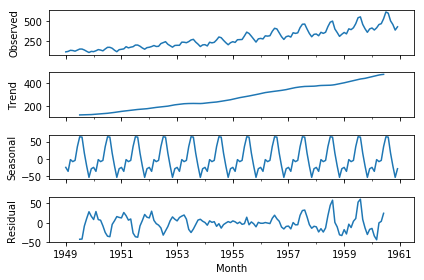

In [26]:
airp_components = seasonal_decompose(airp)
airp_components.plot()
plt.show()

In [27]:
airp_components.trend.head(10)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: Passengers, dtype: float64

In [28]:
airp_components.seasonal.head()

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
Name: Passengers, dtype: float64

In [29]:
airp_components.resid.head(10)

Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: Passengers, dtype: float64

In [30]:
# There are clear trends and seasonality.

### 3.2 Additional plots to check for trend

In [31]:
airp.rolling(12).mean().head(15)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
Name: Passengers, dtype: float64

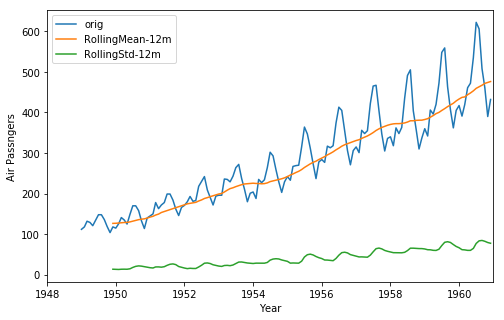

In [32]:
fig = plt.figure(figsize = (8,5))
plt.plot(airp.index, airp, label = 'orig')
plt.plot(airp.rolling(12).mean(), label = 'RollingMean-12m')
plt.plot(airp.rolling(12).std(), label = 'RollingStd-12m')

plt.xlabel('Year')
plt.xlim('1948', '1961')

plt.ylabel('Air Passngers')

plt.legend()

plt.show()

In [33]:
# rolling std is flat. But, we can see that there is clear trend in the rolling mean. 
# Both need to be flat for the series to be stationary

### 3.3 Dickey Fuller Test 

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adf_test = adfuller(airp)

adf_test_out = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
adf_test_out

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64

In [36]:
#In the above test, the null hypthesis is that the Series is non-stationary. 
# If p-value from test is below 0.05, then we can reject null hypthosis, and say its a stationary series
# But p-value is high, so we cannot reject null hypothesis which states series is non-stationary

**Lets do some transformations to our series to make it stationary**

**log transformation**

In [37]:
adf_test = adfuller(np.log(airp))

adf_test_out = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
adf_test_out

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64

In [38]:
# p value is still high

**Differencing**

In [39]:
airp.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [41]:
airp.shift().head()

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
Name: Passengers, dtype: float64

In [42]:
(airp - airp.shift()).head()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

In [46]:
airp.diff().head() # .diff method does the same as above. So we will use this going forward.

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

**Lets do the Fuller test on differenced series**

In [54]:
adf_test = adfuller(airp.diff().dropna())

adf_test_out = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
adf_test_out

Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
dtype: float64

In [48]:
# p -value is borderline. 
# It should be <= 0.05 to reject null hypothesis and to say that the series is stationary

**Rolling mean plot of the differenced Series**

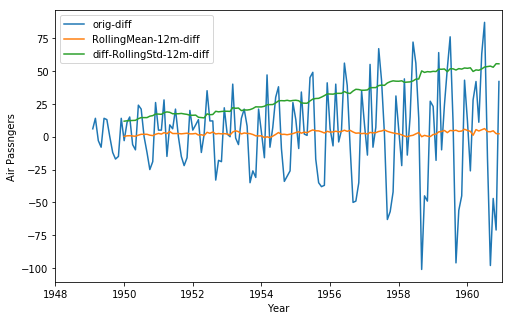

In [49]:
fig = plt.figure(figsize = (8,5))
plt.plot(airp.diff(),label = 'orig-diff')
plt.plot(airp.diff().rolling(12).mean(), label = 'RollingMean-12m-diff')
plt.plot(airp.diff().rolling(12).std(), label = 'diff-RollingStd-12m-diff')

plt.xlabel('Year')
plt.xlim('1948', '1961')

plt.ylabel('Air Passngers')

plt.legend()

plt.show()

In [50]:
#  First order differencing is making the seriess almost stationary
# So, We can fix the d value to be 1 for now

In [51]:
airp_diff = airp.diff().dropna() # This variable now holds only differenced values
airp_diff.head()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: Passengers, dtype: float64

## 4. ARIMA Models

### 4.1 Determining parameters for ARIMA
* p - order of Autoregression
* q - order for Moving average
* d - order of differencing

In [55]:
# we have already seen that d = 1 is close, though d = 2 might be better. What about p and q?

**ACF and PACF plots**

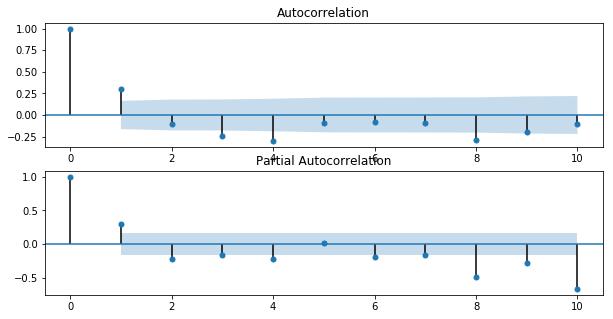

In [56]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
fig = plot_acf(airp_diff.dropna(),lags=10, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(airp_diff.dropna(),lags = 10, ax=ax2)        

In [59]:
# Correlations upto lag 1 seems to be above the blue significance band

In [61]:
#in the above plots, there is a sudden drop after lag 1 for both ACF and PACF plots
# value for q and p can therefore be chosen either 1 or 2

### 4.2. Comparing different models

In [62]:
from statsmodels.tsa.arima_model import ARIMA

**AR Model**

In [65]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

armodel = ARIMA(airp, order = (2,1,0)) 
# we can pass the original data without differencing, because we are including 1 in above argument

AR_model = armodel.fit()
print ('AIC for AR model:', AR_model.aic)
print ('MSE for AR model:', mean_squared_error(airp[1:], AR_model.predict(typ='levels')))
#These errors are calculated between actual differenced values, and model fitted differenced values

AIC for AR model: 1397.9751521795488
MSE for AR model: 973.4222892793608


**MA model**

In [66]:
mamodel = ARIMA(airp, order = (0,1,2)) 
MA_model = mamodel.fit()

print ('AIC for MA model:', MA_model.aic)
print ('MSE for MA model:', mean_squared_error(airp[1:],MA_model.predict(typ='levels')))
#These errors are calculated between actual differenced values, and model fitted differenced values

AIC for MA model: 1398.3855317871069
MSE for MA model: 974.4838757764381


**ARIMA**

In [68]:
arimamodel = ARIMA(airp, order = (2,1,2)) 
ARIMA_model = arimamodel.fit()

print ('AIC for ARIMA model:', ARIMA_model.aic)
print ('MSE for ARIMA model:', mean_squared_error(airp[1:],ARIMA_model.predict(typ='levels')))
#These errors are calculated between actual differenced values, and model fitted differenced values

AIC for ARIMA model: 1344.0434079652089
MSE for ARIMA model: 627.8824375018565


In [69]:
# Looks like ARIMA model is the best compared to AR, and MA models

**What about the insample predicted values**

In [70]:
ARIMA_model.predict(typ='levels').head() # Actual predictions. 

1949-02-01    114.531071
1949-03-01    121.350799
1949-04-01    137.221060
1949-05-01    129.789557
1949-06-01    119.169660
Freq: MS, dtype: float64

**These are the original values**

In [71]:
airp[1:].head() # original values

Month
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: Passengers, dtype: int64

**Plotting the residuals**

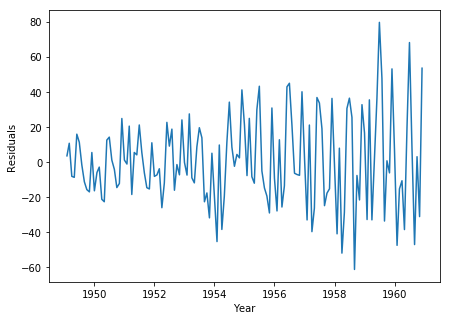

In [72]:
fig = plt.figure(figsize = (7,5))
plt.plot(ARIMA_model.resid) 
plt.xlabel('Year')
plt.ylabel('Residuals')
# residuals are the differences between predicted and actual differenced values
plt.show()

**Plotting the original in-sample and predicted values**

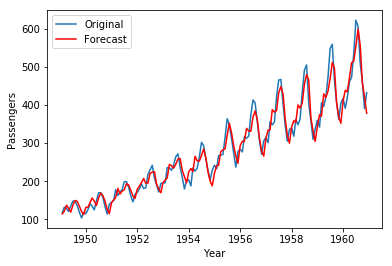

In [73]:
plt.plot(airp[1:], label = 'Original')
plt.plot(ARIMA_model.predict(typ='levels'), label = 'Forecast', color='r')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

**Above plot can be generated another way with plot_predict method**

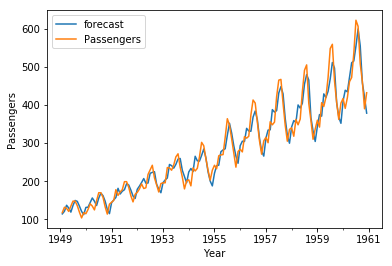

In [74]:
ARIMA_model.plot_predict() # produces similar plot as above
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

In [75]:
# Ok. so far good. The model seems to do well on the in sample dataset. 
# But it doesnt mean much, unless we forecast on the data which the model has not seen before

**Train/Test split**

In [76]:
airp.head(3)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: Passengers, dtype: int64

In [77]:
airp.shape

(144,)

In [78]:
n_train = int(airp.shape[0]*0.9) # 90% of data goes into training set
n_test = airp.shape[0]-n_train
print (n_train)
print (n_test)

129
15


In [79]:
X_train = airp[:n_train]
X_train.shape

(129,)

In [80]:
X_train.head(3) # Training data

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: Passengers, dtype: int64

In [81]:
X_train.tail(3)

Month
1959-07-01    548
1959-08-01    559
1959-09-01    463
Name: Passengers, dtype: int64

In [82]:
X_test = airp[n_train:]
X_test.shape

(15,)

In [83]:
X_test.head(3) # Test data

Month
1959-10-01    407
1959-11-01    362
1959-12-01    405
Name: Passengers, dtype: int64

**ARIMA on Training Data**

In [84]:
modeltrain = ARIMA(X_train, order=(2,1,2))
ARIMA_train = modeltrain.fit()

print ('AIC on Training Data:', ARIMA_train.aic)
print ('MSE on Training Data:', mean_squared_error(X_train[1:],ARIMA_train.predict(typ = 'levels')))
#These errors are calculated between actual differenced values, and model fitted differenced values

AIC on Training Data: 1189.1968732931387
MSE on Training Data: 559.7826962120034


**Forecasting on the Test Data**

<Figure size 1080x720 with 0 Axes>

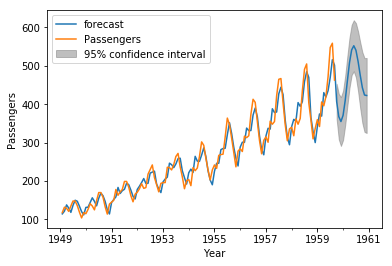

In [85]:
plt.figure(figsize = (15,10))

ARIMA_train.plot_predict(1,143) 
plt.xlabel('Year')
plt.ylabel('Passengers')
# .plot_predict predicts and plots, both insample and outofsample values.
# It uses trained ARIMA model on training data and plots predictions on whatever start, end we give
# we have only 144 examples. But we can predict into future as well using plot_predict function
plt.show()

In [86]:
# Similar to above figure, we can forecast the predictions manually and then plot

In [87]:
fc, se, conf = ARIMA_train.forecast(steps = X_test.shape[0], alpha = 0.05)


airp_fc = pd.Series(fc, index = X_test.index)

lowerb_conf = pd.Series(conf[:,0], index = X_test.index)
upperb_conf = pd.Series(conf[:,1], index = X_test.index)

In [88]:
X_test.head(3) #Actual test values

Month
1959-10-01    407
1959-11-01    362
1959-12-01    405
Name: Passengers, dtype: int64

In [89]:
airp_fc.head(3) # Forecasted values on the test data set

Month
1959-10-01    407.122863
1959-11-01    367.722700
1959-12-01    355.024541
dtype: float64

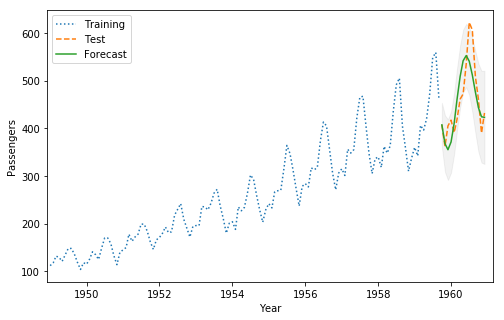

In [91]:
plt.figure(figsize = (8,5))

plt.plot(X_train, label = 'Training', linestyle = ':')
plt.plot(X_test, label = 'Test', linestyle = '--')
plt.plot(airp_fc, label = 'Forecast', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.xlim('1948-12-01','1961-03-01')

plt.fill_between(lowerb_conf.index, lowerb_conf, upperb_conf, color='k', alpha = 0.05)
plt.legend()
plt.show()

### Forecasting into future

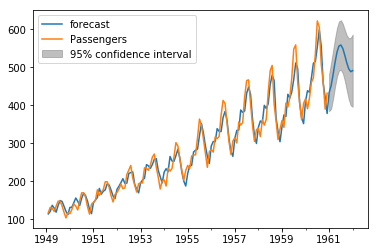

In [92]:
ARIMA_model.plot_predict(1,156) # For an extra 12 months
plt.show()

In [93]:
# we can again generate a similar forecast manually using .forecast method

In [94]:
fcf, sef, conff = ARIMA_model.forecast(steps = 12, alpha = 0.05) 
# Lets use the ARIMA_model which was fitted on entire dataset, instead of X_train


airp_fcf = pd.Series(fcf, index = pd.date_range('1961-01-01', '1962-01-01', freq='M'))

lowerb_conff = pd.Series(conff[:,0], index = pd.date_range('1961-01-01', '1962-01-01', freq = 'M'))
upperb_conff = pd.Series(conff[:,1], index = pd.date_range('1961-01-01', '1962-01-01', freq = 'M'))

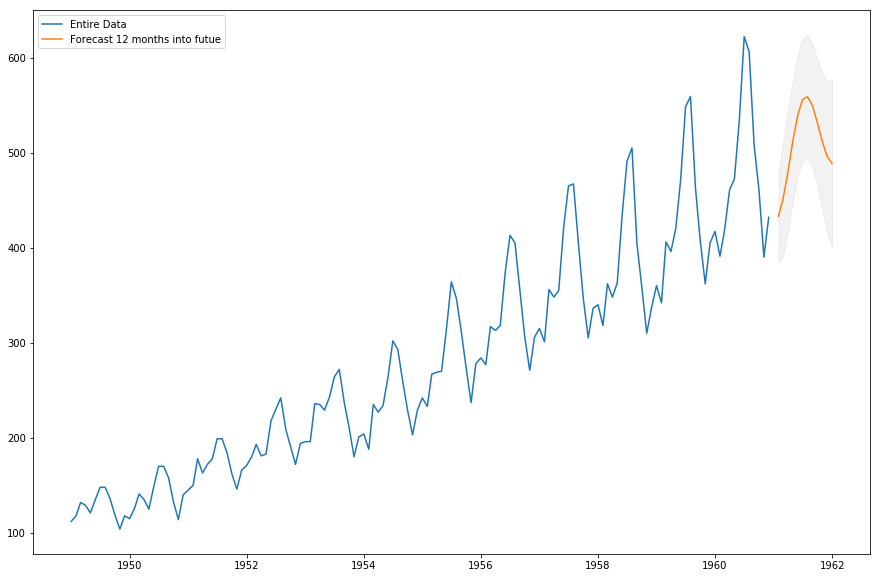

In [95]:
plt.figure(figsize = (15,10))

plt.plot(airp, label = 'Entire Data')

plt.plot(airp_fcf, label = 'Forecast 12 months into futue')

plt.fill_between(lowerb_conff.index, lowerb_conff, upperb_conff, color='k', alpha = 0.05)
plt.legend()
plt.show()